In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
X, y = make_blobs(n_samples=625, n_features=2, centers=[(0, 0), (5, 5)], cluster_std=[0.5, 0.8], random_state=42)
y = np.where(y == 0, -1, 1)

In [8]:
class Adaline(object):

    def __init__(self, eta=0.01, pathModels='.//models'):
        self.W = list()
        self.errorForEachEpoch = list()
        self.eta = eta
        self.pathModels = pathModels

    def initRandomW(self, X):
        W_ = list()
        totalMean_ = np.mean(X)
        totalStd_ = np.std(X)
        means_ = np.mean(X, axis=0)
        stds_ = np.std(X, axis=0)
        ramdon_seed = np.random.RandomState()
        W_.append(ramdon_seed.normal(loc=totalMean_, scale=totalStd_))
        for mean, std in zip(means_, stds_):
            W_.append(ramdon_seed.normal(loc=mean, scale=std))
        return np.array(W_)

    def fit(self, trainingX, trainingY, epochs=50):
        nameModel_ = None
        if not self.W:
            self.W = self.initRandomW(trainingX)
        if self.errorForEachEpoch:
            bestError = min(self.errorForEachEpoch)
        else:
            bestError = np.inf

        for _ in range(epochs):
            randomIndices_ = np.array(range(trainingX.shape[0]))
            np.random.shuffle(randomIndices_)
            for xi, target in zip(trainingX[randomIndices_, :], trainingY[randomIndices_]):
                net_input = self._net_input(xi)
                activation_function = self._activation(net_input)
                errors = target - activation_function
                self.W[1:] = self.W[1:] + self.eta * errors * xi
                self.W[0] = self.W[0] + self.eta * errors
            error_ = self.error(trainingX, trainingY)
            self.errorForEachEpoch.append(error_)
            if error_ < bestError:
                bestError = error_
        return nameModel_

    def _net_input(self, X):
        return np.dot(X, self.W[1:]) + self.W[0]

    def _activation(self, p_net_input):
        return p_net_input

    def _quantization(self, p_activation):
        return np.where(p_activation >= 0.0, 1, -1)

    def predict(self, X):
        net_in = self._net_input(X)
        activation = self._activation(net_in)
        output = self._quantization(activation)
        return output

    def error(self, X, Y):
        error_ = 0
        for xi, target in zip(X, Y):
            net_input  = self._net_input(xi)
            activation = self._activation(net_input)
            error_ += ((target - activation) ** 2)
        return error_ / X.shape[0]

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

In [9]:
clf = Adaline(eta=0.01)
clf.fit(X, y)
print(f"Precisión del modelo: {clf.score(X, y):.4f}")

Precisión del modelo: 1.0000


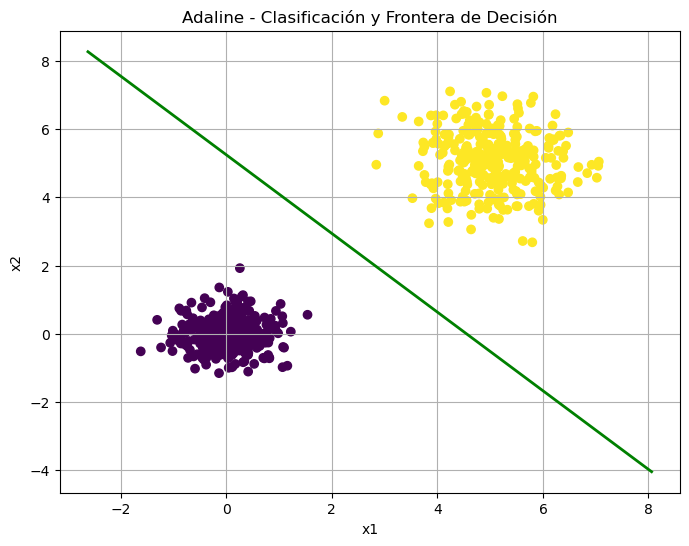

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')

w0, w1, w2 = clf.W[0], clf.W[1], clf.W[2]
x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_vals = -(w0 + w1 * x1_vals) / w2

plt.plot(x1_vals, x2_vals, color='green', linewidth=2, label='Frontera de decisión')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Adaline - Clasificación y Frontera de Decisión')
plt.grid()
plt.show()